<a href="https://colab.research.google.com/github/pavel7479/My_a/blob/main/%D0%A3%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%91%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка БД любого размера

In [ ]:
# @title Загрузка библиотек
import os
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten


In [ ]:
# @title Подготовка объединённой таблицы

# Задайте путь к директории, которую нужно просканировать
directory_path = '/content/Italiy/'

# Список столбцов, которые нужно оставить
columns_to_keep = ['Date',	'HomeTeam',	'AwayTeam',	'FTHG',	'FTAG',	'FTR',	'HTHG',	'HTAG',	'HTR',	'HS',	'AS',	'HST',	'AST',
                   'HF',	'AF',	'HC',	'AC',	'HY',	'AY',	'HR',	'AR']

# Получите список всех файлов в директории
file_list = os.listdir(directory_path)

# Создаём объеденённую таблицу
df_join = []
df_join = pd.DataFrame(df_join)
# Переберите все файлы и выполните нужные действия
for file_name in file_list:
    # Получите полный путь к файлу
    file_path = os.path.join(directory_path, file_name)

    # Проверяем, является ли файл
    if os.path.isfile(file_path):
        # читаем файл
        data = pd.read_csv(file_path, encoding='cp1251', delimiter=',')
        # переводим в DataFrame
        df = pd.DataFrame(data)
        # переводим в DataFrame
        df = pd.DataFrame(data)
        # оставляем нужные колонки
        df = df.drop(columns=df.columns.difference(columns_to_keep))
        # Объединение данных всех таблиц
        df_join = pd.concat([df_join, df])
    else:
        print(f"{file_name} не является файлом данных и будет пропущен.")

# Вывод объединенной таблицы
print(df_join)
print(df_join.shape)


.ipynb_checkpoints не является файлом данных и будет пропущен.
         Date    HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR    HS  \
0    25/08/12  Fiorentina   Udinese   2.0   1.0   H   0.0   1.0   A  23.0   
1    25/08/12    Juventus     Parma   2.0   0.0   H   0.0   0.0   D  15.0   
2    26/08/12    Atalanta     Lazio   0.0   1.0   A   0.0   1.0   A  10.0   
3    26/08/12      Chievo   Bologna   2.0   0.0   H   0.0   0.0   D   6.0   
4    26/08/12       Genoa  Cagliari   2.0   0.0   H   0.0   0.0   D  15.0   
..        ...         ...       ...   ...   ...  ..   ...   ...  ..   ...   
375  28/05/17       Inter   Udinese   5.0   2.0   H   3.0   0.0   H  17.0   
376  28/05/17     Palermo    Empoli   2.0   1.0   H   0.0   0.0   D  10.0   
377  28/05/17        Roma     Genoa   3.0   2.0   H   1.0   1.0   D  24.0   
378  28/05/17   Sampdoria    Napoli   2.0   4.0   A   0.0   2.0   A  12.0   
379  28/05/17      Torino  Sassuolo   5.0   3.0   H   3.0   2.0   H  16.0   

     ...  HS

In [ ]:
# @title Выявим пропущенные значения и удалим их

# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
print(df_join.isnull().sum())
# удвление пустых значений
df_join.dropna(inplace=True)
print(df_join.isnull().sum())

Date        5
HomeTeam    5
AwayTeam    5
FTHG        5
FTAG        5
FTR         5
HTHG        7
HTAG        7
HTR         7
HS          6
AS          6
HST         6
AST         6
HF          6
AF          6
HC          6
AC          6
HY          7
AY          6
HR          6
AR          6
dtype: int64
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


In [ ]:
# @title Удаляем столбез дата т.к. данные идут в порядке увеличения дат

df_join = df_join.drop('Date', axis=1)

In [ ]:
# @title Замена значений в столбцах FTR и HTR

df_join['FTR'] = df_join['FTR'].replace({'A': 0, 'H': 1, 'D': 1})
df_join['HTR'] = df_join['HTR'].replace({'A': 0, 'H': 1, 'D': 1})

print(df_join)


         Date    HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR    HS  \
0    25/08/12  Fiorentina   Udinese   2.0   1.0    1   0.0   1.0    0  23.0   
1    25/08/12    Juventus     Parma   2.0   0.0    1   0.0   0.0    1  15.0   
2    26/08/12    Atalanta     Lazio   0.0   1.0    0   0.0   1.0    0  10.0   
3    26/08/12      Chievo   Bologna   2.0   0.0    1   0.0   0.0    1   6.0   
4    26/08/12       Genoa  Cagliari   2.0   0.0    1   0.0   0.0    1  15.0   
..        ...         ...       ...   ...   ...  ...   ...   ...  ...   ...   
375  28/05/17       Inter   Udinese   5.0   2.0    1   3.0   0.0    1  17.0   
376  28/05/17     Palermo    Empoli   2.0   1.0    1   0.0   0.0    1  10.0   
377  28/05/17        Roma     Genoa   3.0   2.0    1   1.0   1.0    1  24.0   
378  28/05/17   Sampdoria    Napoli   2.0   4.0    0   0.0   2.0    0  12.0   
379  28/05/17      Torino  Sassuolo   5.0   3.0    1   3.0   2.0    1  16.0   

     ...  HST  AST    HF    AF    HC    AC   HY   A

In [ ]:
# @title Замена названий команд на цифры

# Создание множества футбольных комманд
set_commands = set()
for index, value in enumerate(df_join['HomeTeam']):
  set_commands.add(value)
set_commands = set(df_join['HomeTeam'].astype(str))
set_commands_sorted = sorted(set_commands)

print(set_commands_sorted)
print(len(set_commands_sorted))

# Создание словаря соответствий
mapping = {}
for i, k in enumerate(set_commands_sorted):
  mapping[k] = i
print(mapping)
print()
# Замена значений названий комманд в столбцах с использованием словаря
df_join['HomeTeam'] = df_join['HomeTeam'].replace(mapping)
df_join['AwayTeam'] = df_join['AwayTeam'].replace(mapping)
print(df_join)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9']
36
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '4': 30, '5': 31, '6': 32, '7': 33, '8': 34, '9': 35}

         Date  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR    HS  \
0    25/08/12        11        33   2.0   1.0    1   0.0   1.0    0  23.0   
1    25/08/12        15        23   2.0   0.0    1   0.0   0.0    1  15.0   
2    26/08/12         0        16   0.0   1.0    0   0.0   1.0    0  10.0   
3    26/08/12         8         2   2.0   0.0    1   0.0   0.0    1   6.0   
4    26/08/12        13         4   2.0   0.0    1   0.0   0.0 

In [ ]:
#@title Нормализация

from sklearn.preprocessing import MinMaxScaler


# Создание копий столбцов, которые будут исключены из нормализации. И сброс их индексов
htr_column = df_join['HTR'].copy().reset_index(drop=True)
home_team_column = df_join['HomeTeam'].copy().reset_index(drop=True)
away_team_column = df_join['AwayTeam'].copy().reset_index(drop=True)

# Удаление столбцов, которые не будут нормализованы
columns_to_normalize = df_join.drop(['HTR', 'HomeTeam', 'AwayTeam'], axis=1)

# Нормализация данных
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(columns_to_normalize), columns = columns_to_normalize.columns)

# Добавление столбцов обратно к нормализованным данным
df_normalized['HTR'] = htr_column
df_normalized['HomeTeam'] = home_team_column
df_normalized['AwayTeam'] = away_team_column

# Вывод нормализованной таблицы
print(df_normalized)

          FTHG      FTAG  FTR  HTHG  HTAG        HS        AS       HST  \
0     0.285714  0.142857  1.0   0.0   0.2  0.488889  0.225806  0.444444   
1     0.285714  0.000000  1.0   0.0   0.0  0.311111  0.193548  0.333333   
2     0.000000  0.142857  0.0   0.0   0.2  0.200000  0.419355  0.166667   
3     0.285714  0.000000  1.0   0.0   0.0  0.111111  0.129032  0.166667   
4     0.285714  0.000000  1.0   0.0   0.0  0.311111  0.548387  0.222222   
...        ...       ...  ...   ...   ...       ...       ...       ...   
4172  0.714286  0.285714  1.0   0.6   0.0  0.355556  0.548387  0.333333   
4173  0.285714  0.142857  1.0   0.0   0.0  0.200000  0.548387  0.277778   
4174  0.428571  0.285714  1.0   0.2   0.2  0.511111  0.419355  0.388889   
4175  0.285714  0.571429  0.0   0.0   0.4  0.244444  0.709677  0.111111   
4176  0.714286  0.428571  1.0   0.6   0.4  0.333333  0.677419  0.500000   

         AST        HF        AF        HC        AC        HY     AY   HR  \
0     0.1250  0.34615

In [ ]:
# @title Приминение one-hot encoding к столбцам HomeTeam	и AwayTeam т.е. к названиям комманд
pd.get_dummies(df_normalized['HomeTeam']).head()
pd.get_dummies(df_normalized['AwayTeam']).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# @title Создание тренировочного набора

# поместим в X_train все кроме столбца HTR
X_train = df_normalized.drop('HTR', axis = 1)

# столбец 'HTR' станет нашей целевой переменной (y_train)
y_train = df_normalized['HTR']

print(X_train.shape)
print(y_train.shape)

(4177, 19)
(4177,)


In [ ]:
# @title Перевод в Numpay массив
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(4177, 19)
(4177,)


# Подготовка тестового набора

In [ ]:
# @title Скачивание файла с тестовыми данными

test = pd.read_csv("test.csv", encoding = 'cp1251', delimiter=',')

# Мой DataFrame
test_df = pd.DataFrame(test)  # Код для создания DataFrame


  # Список столбцов, которые нужно оставить
columns_to_keep = ['Date',	'HomeTeam',	'AwayTeam',	'FTHG',	'FTAG',	'FTR',	'HTHG',	'HTAG',	'HTR',	'HS',	'AS',
                   'HST',	'AST', 'HF',	'AF',	'HC',	'AC',	'HY',	'AY',	'HR',	'AR']  # Столбцы которые нужно оставить

  # Удаление всех столбцов, кроме указанных
test_df = test_df.drop(columns = test_df.columns.difference(columns_to_keep))

# Замена значений в столбце 'Столбец1'
test_df['FTR'] = test_df['FTR'].replace({'A': 0, 'H': 1, 'D': 1})
test_df['HTR'] = test_df['HTR'].replace({'A': 0, 'H': 1, 'D': 1})

print(test_df)

In [ ]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
test_df.isnull().sum()
# удвление пустых значений
test_df.dropna(inplace=True)
test_df.isnull().sum()

In [ ]:
# @title Создание множества футбольных комманд
set_commands = set()
for index, value in enumerate(test_df['HomeTeam']):
  set_commands.add(value)
set_commands = set(test_df['HomeTeam'].astype(str))
set_commands_sorted = sorted(set_commands)
#set_commands_sorted.remove('nan')
print(set_commands_sorted)
print(len(set_commands_sorted))

# Создание словаря соответствий
mapping = {}
for i, k in enumerate(set_commands_sorted):
  mapping[k] = i
print(mapping)

# Замена значений названий комманд в столбцах с использованием словаря
test_df['HomeTeam'] = test_df['HomeTeam'].replace(mapping)
test_df['AwayTeam'] = test_df['AwayTeam'].replace(mapping)
print(test_df)

# Удаляем столбез дата т.к. данные идут в порядке увеличения дат
test_df = test_df.drop('Date', axis=1)
test_df

In [ ]:
#@title Нормализация тестовых данных

from sklearn.preprocessing import MinMaxScaler
# Создание копий столбцов, которые будут исключены из нормализации. И сброс их индексов
htr_column = test_df['HTR'].copy().reset_index(drop=True)
home_team_column = test_df['HomeTeam'].copy().reset_index(drop=True)
away_team_column = test_df['AwayTeam'].copy().reset_index(drop=True)

# Удаление столбцов, которые не будут нормализованы
columns_to_normalize = test_df.drop(['HTR', 'HomeTeam', 'AwayTeam'], axis=1)

# Нормализация данных
scaler = MinMaxScaler()
test_df_normalized = pd.DataFrame(scaler.fit_transform(columns_to_normalize), columns=columns_to_normalize.columns)

# Добавление столбцов обратно к нормализованным данным
test_df_normalized['HTR'] = htr_column
test_df_normalized['HomeTeam'] = home_team_column
test_df_normalized['AwayTeam'] = away_team_column

# Вывод нормализованной таблицы
print(test_df_normalized)

In [ ]:
# @title Приминение one-hot encoding к столбцам HomeTeam	и AwayTeam т.е. к названиям комманд

pd.get_dummies(test_df_normalized['HomeTeam']).head()
pd.get_dummies(test_df_normalized['AwayTeam']).head()

In [ ]:
#@title Разделение тестовой выборки на признаки (X_test) и целевую переменную (y_test)

# поместим в X_test все кроме столбца HTR
X_test = test_df_normalized.drop('HTR', axis = 1)

# столбец 'HTR' станет нашей целевой переменной (y_test)
y_test = test_df_normalized['HTR']

print(X_test.shape)
print(y_test.shape)

# Создание нейросети

In [ ]:
# @title Проверка размерности

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print()
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
# @title Перевод в Numpay массив
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test= np.array(X_test)
y_test = np.array(y_test)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print()
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
# @title Нейросеть 1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the neural network model
model = Sequential()
model.add(Dense(300, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(40, activation='tanh'))
model.add(Dense(60, activation='ReLU'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Точность на тестовом наборе:", accuracy)


Epoch 1/25
105/105 [==============================] - 2s 6ms/step - loss: 0.5566 - accuracy: 0.7567 - val_loss: 0.5624 - val_accuracy: 0.7488
Epoch 2/25
105/105 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7761 - val_loss: 0.4614 - val_accuracy: 0.7895
Epoch 3/25
105/105 [==============================] - 0s 4ms/step - loss: 0.4045 - accuracy: 0.8360 - val_loss: 0.4011 - val_accuracy: 0.8014
Epoch 4/25
105/105 [==============================] - 0s 4ms/step - loss: 0.3172 - accuracy: 0.8746 - val_loss: 0.2785 - val_accuracy: 0.9091
Epoch 5/25
105/105 [==============================] - 1s 6ms/step - loss: 0.2028 - accuracy: 0.9470 - val_loss: 0.1629 - val_accuracy: 0.9593
Epoch 6/25
105/105 [==============================] - 1s 5ms/step - loss: 0.0974 - accuracy: 0.9892 - val_loss: 0.0912 - val_accuracy: 0.9880
Epoch 7/25
105/105 [==============================] - 1s 6ms/step - loss: 0.0634 - accuracy: 0.9961 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 

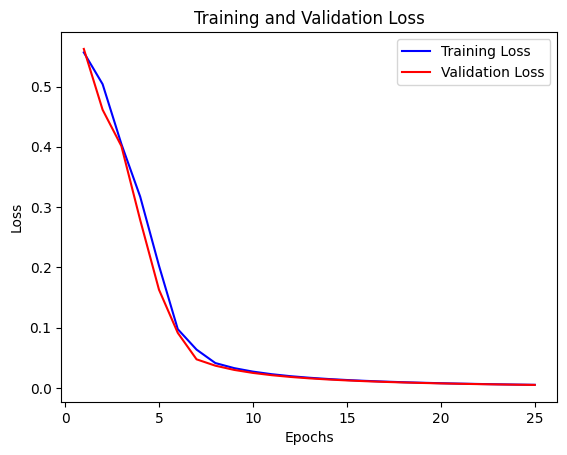

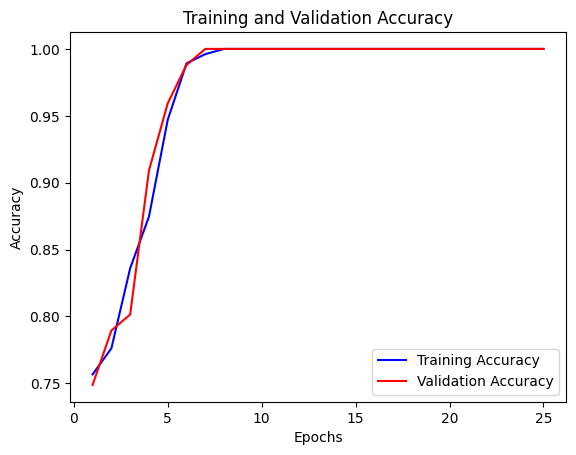

In [ ]:
# @title Вывод графиков

import matplotlib.pyplot as plt

# График функции потерь
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График точности
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()